# Linear regression

## Apply a multiple linear regresssion on the given dataset.

### Variable list

* G3: dependent variable, which means final grade (numeric from 0 to 20)
* school: school (binary: GP or MS)
* sex: sex (binary: F or M)
* age: age (numeric from 15 to 22)
* address: home address type (binary: U or R)
* famsize: family size (binary: LE3 or GT3)
* Pstatus: parent's cohabitation status (binary: T or A)
* Medu: mother's education (ordinal: from 0 to 4)
* Fedu: father's education (ordinal: from 0 to 4)
* Mjob: mother's job (nominal: 5 categories)
* Fjob: father's job (nominal: 5 categories)
* reason: reason to choose this school (nominal: 3 categories)
* guardian: guardian (nominal: 3 categories)
* traveltime: home to school travel time (ordinal: from 1 to 4)
* studytime: weekly study time (ordinal: from 1 to 4)
* failures: number of pass class failures (ordinal: from 1 to 4)
* schoolsup: extra educational support (binary: yes or no)
* famsup: family educational support (binary: yes or no)
* paid: extra paid classes within the course subject (binary: yes or no)
* activities: extra-curricular activities (binary: yes or no)
* nursery: attended nursery school (binary: yes or no)
* higher: wants to take higher education (binary: yes or no)
* internet: internet access at home (binary: yes or no)
* romantic: with a romantic relationship (binary: yes or no)
* famrel: quality of family relationship (ordinal: from 1 to 5)
* freetime: free time after school (ordinal: from 1 to 5)
* goout: going out with friends (ordinal: from 1 to 5)
* Dalc: Workday alcohol consumption (ordinal: from 1 to 5)
* Walc: Weekend alcohol consumption (ordinal: from 1 to 5)
* health: current health status (ordinal: from 1 to 5)
* absences: number of school absences (numeric: from 0 to 93)
* course: course of the grade (binary: math or portuguese)

In [1028]:
binaries = [
    "school", "sex", "address", "famsize", "Pstatus", "schoolsup", 
    "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic", 
    "course"
]
numerics = ["age", "absences"]
ordinal = [
    "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", 
    "Dalc", "Walc", "health"
]
nominal = ["Mjob", "Fjob", "reason", "guardian"]

In [1029]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t, f, chi2, skew, kurtosis
from sklearn.linear_model import LinearRegression

In [1030]:
df = pd.read_csv("students_grade.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,course
0,GP,F,18.0,U,NaN,A,4.0,4.0,at_home,teacher,...,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6.0,math
1,GP,F,17.0,U,NaN,T,1.0,1.0,at_home,other,...,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,6.0,math
2,GP,F,15.0,U,NaN,T,1.0,1.0,at_home,other,...,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,10.0,math
3,GP,F,15.0,U,NaN,T,4.0,2.0,health,services,...,yes,3.0,2.0,NaN,1.0,1.0,5.0,2.0,15.0,math
4,GP,F,16.0,U,NaN,T,3.0,3.0,other,other,...,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,10.0,math


## Part 1: Pre-processing

1-(1). some input variables contain missing values. If the proportion of missing values in a variable exceeds 80%, the variable should be excluded from the dataset. Is there any variable to be excluded?

In [1031]:
df = df.dropna(axis=1, thresh=1043*0.2)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1028 non-null   object 
 1   sex         1034 non-null   object 
 2   age         1036 non-null   float64
 3   address     1031 non-null   object 
 4   Pstatus     1029 non-null   object 
 5   Medu        1034 non-null   float64
 6   Fedu        1028 non-null   float64
 7   Mjob        1037 non-null   object 
 8   Fjob        1029 non-null   object 
 9   reason      1035 non-null   object 
 10  guardian    1030 non-null   object 
 11  traveltime  1036 non-null   float64
 12  studytime   1024 non-null   float64
 13  failures    1035 non-null   float64
 14  schoolsup   1032 non-null   object 
 15  famsup      1035 non-null   object 
 16  paid        1033 non-null   object 
 17  nursery     1026 non-null   object 
 18  higher      1037 non-null   object 
 19  internet    1037 non-null  

2 column(famsize, activities) was deleted in original table.

1-(2) After excluding some variables if necessary, some rows containing missing values should be deleted from the dataset. How many samples need to be removed? After removing any sample with missing values, how many samples remain in the dataset?

In [1032]:
print(len(df))
df = df.dropna()
print(len(df))


1044
761


1044 -> 761

### For all subsequent questions, the data pre-processed above are used.

Transform binaries or nominal variables into dummy variables (0 and 1) for further analysis.

In [1033]:
binaries 
df = pd.get_dummies(df, columns=["school", "sex", "address", "Pstatus", "schoolsup", 
    "famsup", "paid", "nursery", "higher", "internet", "romantic", 
    "course", "Mjob", "Fjob", "reason", "guardian"
], drop_first=True)
df


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,1.0,...,0,0,0,0,1,0,0,0,1,0
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,2.0,...,0,0,1,0,0,0,1,0,1,0
4,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,1.0,...,0,0,1,0,0,1,0,0,0,0
5,16.0,4.0,3.0,1.0,2.0,0.0,5.0,4.0,2.0,1.0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,18.0,4.0,4.0,3.0,1.0,0.0,4.0,4.0,3.0,2.0,...,1,0,0,0,0,0,0,1,1,0
1039,19.0,2.0,3.0,1.0,3.0,1.0,5.0,4.0,2.0,1.0,...,0,0,1,0,0,0,0,0,1,0
1040,18.0,3.0,1.0,1.0,2.0,0.0,4.0,3.0,4.0,1.0,...,1,0,0,1,0,0,0,0,1,0
1042,17.0,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,3.0,...,0,0,0,1,0,0,0,0,1,0


1-(3) Find the top 10 input variables that show the high linear correlation with the target based on the correlation coefficients.

In [1034]:
df.corr().abs().sort_values(by = 'G3', ascending=False).head(11).index

Index(['G3', 'failures', 'higher_yes', 'Medu', 'Fedu', 'course_portuguese',
       'studytime', 'school_MS', 'romantic_yes', 'age', 'guardian_other'],
      dtype='object')

'failures', 
'Medu', 
'Fedu', 
'studytime', 
'age', 
'Walc', 
'health',
'Dalc', 
'goout', 
'traveltime'

1-(4) Draw pairwise scatter plots - one scatter plot illustrates the pairwise relationship between one of input variables selected in 1-(3) and output target.

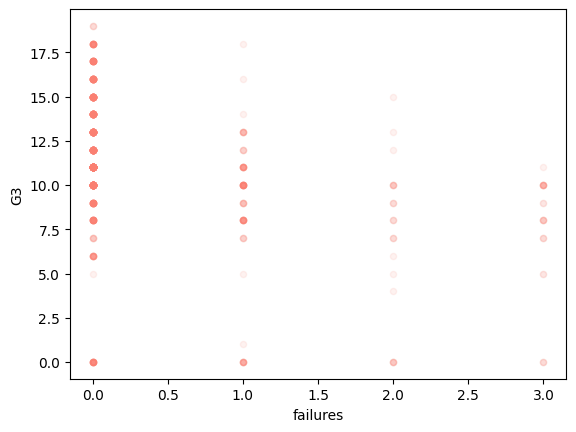

In [1035]:
plt.scatter(df['failures'], df['G3'], s=20, c='salmon', alpha=0.1)
plt.xlabel('failures')
plt.ylabel('G3')
plt.show()

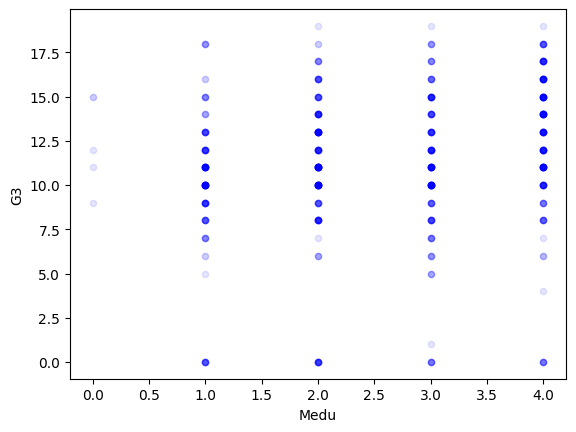

In [1036]:
plt.scatter(df['Medu'], df['G3'], s=20, c='blue', alpha=0.1)
plt.xlabel('Medu')
plt.ylabel('G3')
plt.show()

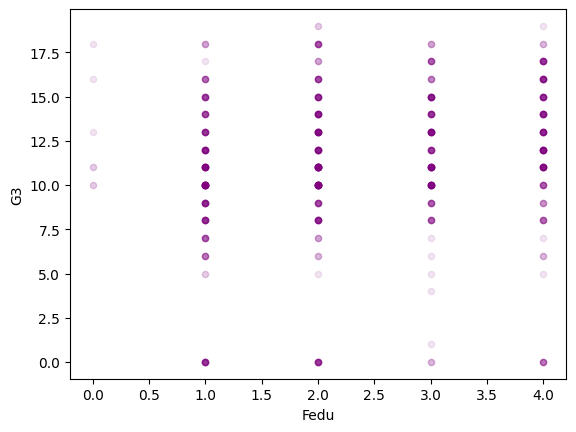

In [1037]:
plt.scatter(df['Fedu'], df['G3'], s=20, c='purple', alpha=0.1)
plt.xlabel('Fedu')
plt.ylabel('G3')
plt.show()

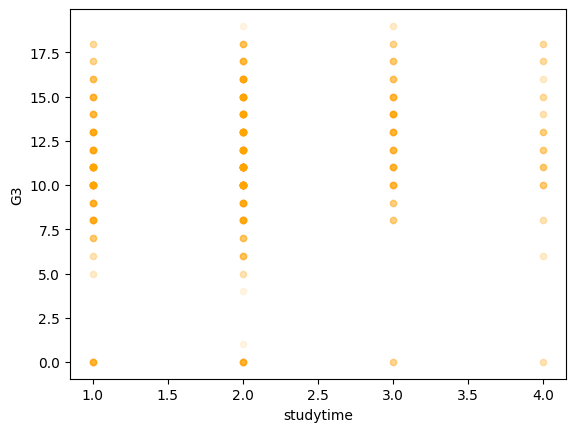

In [1038]:
plt.scatter(df['studytime'], df['G3'], s=20, c='orange', alpha=0.1)
plt.xlabel('studytime')
plt.ylabel('G3')
plt.show()

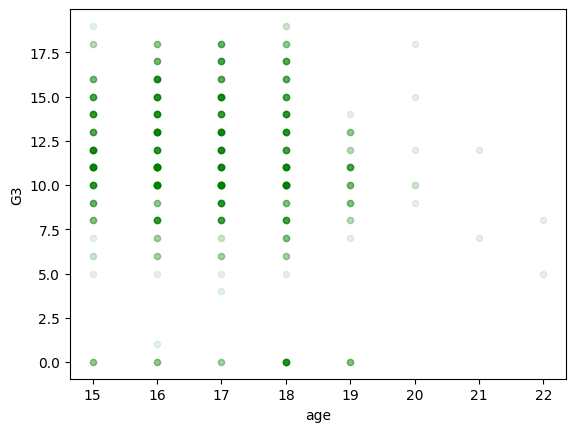

In [1039]:
plt.scatter(df['age'], df['G3'], s=20, c='green', alpha=0.1)
plt.xlabel('age')
plt.ylabel('G3')
plt.show()

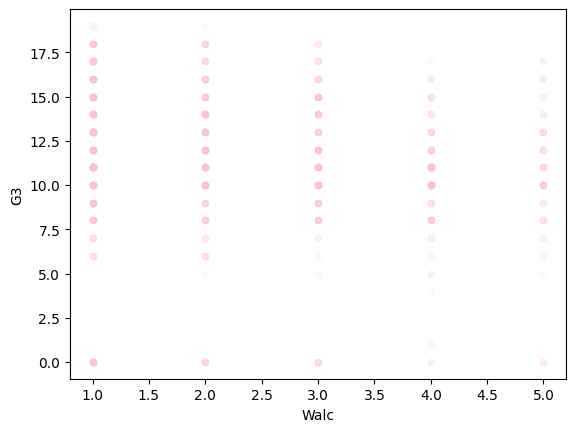

In [1040]:
plt.scatter(df['Walc'], df['G3'], s=20, c='pink', alpha=0.1)
plt.xlabel('Walc')
plt.ylabel('G3')
plt.show()

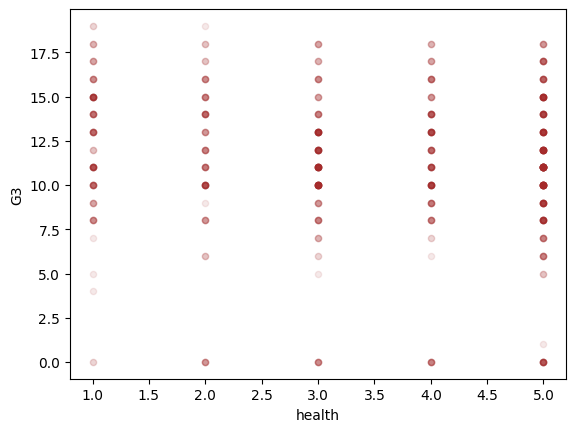

In [1041]:
plt.scatter(df['health'], df['G3'], s=20, c='brown', alpha=0.1)
plt.xlabel('health')
plt.ylabel('G3')
plt.show()

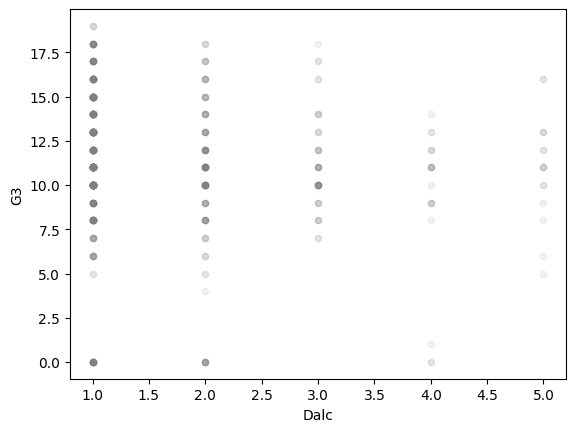

In [1042]:
plt.scatter(df['Dalc'], df['G3'], s=20, c='grey', alpha=0.1)
plt.xlabel('Dalc')
plt.ylabel('G3')
plt.show()

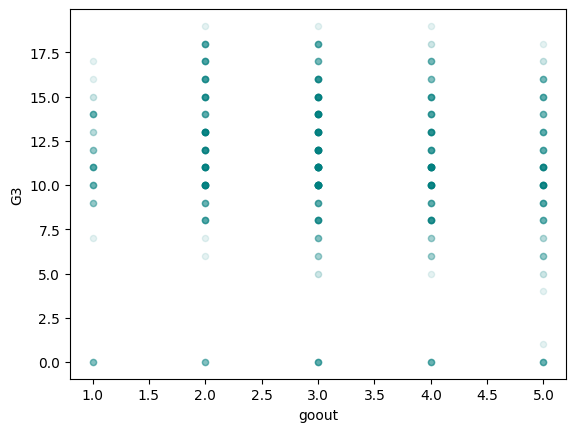

In [1043]:
plt.scatter(df['goout'], df['G3'], s=20, c='teal', alpha=0.1)
plt.xlabel('goout')
plt.ylabel('G3')
plt.show()

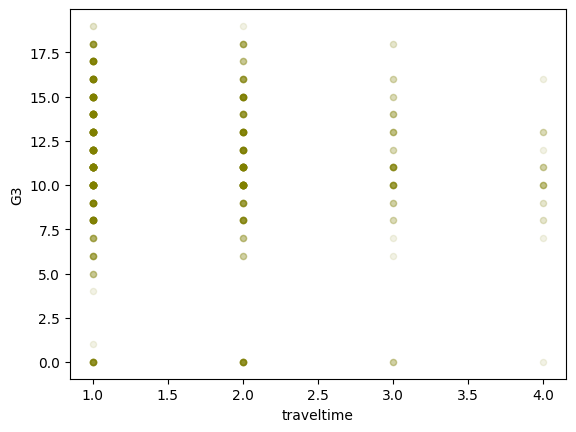

In [1044]:
plt.scatter(df['traveltime'], df['G3'], s=20, c='olive', alpha=0.1)
plt.xlabel('traveltime')
plt.ylabel('G3')
plt.show()

1-(5) Calculate variance inflation factor (VIF) for each explanatory variable and summarize the values using a table.

In [1045]:
X = df

vif_data = pd.DataFrame()
vif_data["Variable names"] = X.columns
vif_data["VIF"] = [1 / (1 - LinearRegression().fit(X.drop([feature], axis=1), X[feature]).score(X.drop([feature], axis=1), X[feature])) for feature in X.columns]

print(vif_data)


       Variable names       VIF
0                 age  1.388230
1                Medu  2.797083
2                Fedu  2.198711
3          traveltime  1.293246
4           studytime  1.257459
5            failures  1.393125
6              famrel  1.137178
7            freetime  1.251613
8               goout  1.417067
9                Dalc  1.848905
10               Walc  2.122693
11             health  1.136783
12           absences  1.218337
13                 G3  1.406420
14          school_MS  1.600930
15              sex_M  1.345492
16          address_U  1.317693
17          Pstatus_T  1.133178
18      schoolsup_yes  1.153156
19         famsup_yes  1.141389
20           paid_yes  1.462653
21        nursery_yes  1.090246
22         higher_yes  1.256417
23       internet_yes  1.251754
24       romantic_yes  1.109330
25  course_portuguese  1.549223
26        Mjob_health  1.810842
27         Mjob_other  2.313649
28      Mjob_services  2.380268
29       Mjob_teacher  2.541970
30      

1-(6) According to the results of question 1-(5), describe your opinion on how to select which variables should be excluded from training a linear regression model. Only in this assignment, if the VIF is 4 or greater, the multicollinearity is considerede to be severe.

Fjob_other  4.833930
Fjob_services  4.368342

In [1046]:
### 1 - remove Fjob_other
df_vif = df.drop('Fjob_other', axis=1)
X = df_vif

vif_data = pd.DataFrame()
vif_data["Variable names"] = X.columns

vif_data["VIF"] = [1 / (1 - LinearRegression().fit(X.drop([feature], axis=1), X[feature]).score(X.drop([feature], axis=1), X[feature])) for feature in X.columns]

print(vif_data)

index_cols = df_vif.columns.to_list()

a1= {
    'VIF' : vif_data["VIF"]
}

a11 = pd.DataFrame(a1, index= index_cols)
a11.to_csv("vif.csv")
### Fjob_services ' VIF became less than 4

       Variable names       VIF
0                 age  1.382982
1                Medu  2.797083
2                Fedu  2.196767
3          traveltime  1.279510
4           studytime  1.257459
5            failures  1.393111
6              famrel  1.135991
7            freetime  1.251320
8               goout  1.416913
9                Dalc  1.847568
10               Walc  2.114272
11             health  1.136237
12           absences  1.216144
13                 G3  1.406403
14          school_MS  1.555900
15              sex_M  1.345303
16          address_U  1.310884
17          Pstatus_T  1.132980
18      schoolsup_yes  1.151027
19         famsup_yes  1.136684
20           paid_yes  1.462589
21        nursery_yes  1.081568
22         higher_yes  1.254683
23       internet_yes  1.251574
24       romantic_yes  1.109279
25  course_portuguese  1.548598
26        Mjob_health  1.802087
27         Mjob_other  2.264732
28      Mjob_services  2.370391
29       Mjob_teacher  2.528060
30      

## Part 2: Modeling

2-(1) Train a linear regression model (M1) using all variables and fill the following table.

In [1047]:
m1_df = df.drop('G3', axis=1)
X1 = m1_df.values

n1, p1 = X1.shape
X1 = np.c_[np.ones(n1), X1]
XtX1 = np.matmul(X1.T, X1)
XtX_inv1 = np.linalg.inv(XtX1)

beta1 = np.matmul(np.matmul(XtX_inv1, X1.T), df[['G3']].values)

y_pred1 = np.matmul(X1, beta1).flatten()
y_true1 = df['G3'].values

SSE1 = np.sum((y_true1 - y_pred1)**2)
MSE1 = SSE1 / (n1-p1-1)

se11 = MSE1 * XtX_inv1
se11 = np.sqrt(np.diag(se11))

tt1 = beta1.flatten()/se11
pvalue1 = (1- t.cdf(np.abs(tt1), n1-p1-1))*2

beta1 = beta1.flatten().tolist()
se11 = se11.tolist()
tt1 = tt1.tolist()
pvalue1 = pvalue1.tolist()

index_cols1 = m1_df.columns.to_list()
index_cols1.insert(0, 'intercept')

a1= {
    'beta' : beta1,
    'se' : se11,
    't-value': tt1,
    'pvalue': pvalue1
}
a11 = pd.DataFrame(a1, index= index_cols1)
a11

,beta,se,t-value,pvalue
intercept,6.769836,2.301893,2.940986,3.376330e-03
age,0.088557,0.114256,0.775070,4.385519e-01
Medu,0.178568,0.182317,0.979436,3.276925e-01
Fedu,0.092802,0.161971,0.572956,5.668530e-01
traveltime,0.015279,0.181455,0.084200,9.329205e-01
studytime,0.311289,0.159103,1.956524,5.078857e-02
failures,-1.283212,0.206145,-6.224792,8.174548e-10
famrel,0.352765,0.134150,2.629627,8.729850e-03
freetime,0.182381,0.133326,1.367937,1.717575e-01
goout,-0.315549,0.124801,-2.528423,1.166964e-02


2-(2) Train a linear regression model (M2) using the selected variable in question 1-(3) and fill the following table.

In [1048]:
X2 = df[['failures', 'higher_yes', 'Medu', 'Fedu', 'course_portuguese',
       'studytime', 'school_MS', 'romantic_yes', 'age', 'guardian_other']].values

n2, p2 = X2.shape
X2 = np.c_[np.ones(n2), X2]
XtX2 = np.matmul(X2.T, X2)
XtX_inv2 = np.linalg.inv(XtX2)

beta2 = np.matmul(np.matmul(XtX_inv2, X2.T), df[['G3']].values)

y_pred2 = np.matmul(X2, beta2).flatten()
y_true2 = df['G3'].values

SSE2 = np.sum((y_true2 - y_pred2)**2)
MSE2 = SSE2 / (n2-p2-1)

se22 = MSE2 * XtX_inv2
se22 = np.sqrt(np.diag(se22))

tt2 = beta2.flatten()/se22
pvalue2 = (1- t.cdf(np.abs(tt2), n2-p2-1))*2

beta2 = beta2.flatten().tolist()
se22 = se22.tolist()
tt2 = tt2.tolist()
pvalue2 = pvalue2.tolist()

index_cols2 = ['intercept','failures', 'higher_yes', 'Medu', 'Fedu', 'course_portuguese',
       'studytime', 'school_MS', 'romantic_yes', 'age', 'guardian_other']

a2= {
    'beta' : beta2,
    'se' : se22,
    't-value': tt2,
    'pvalue': pvalue2
}
a22 = pd.DataFrame(a2, index= index_cols2)
a22

,beta,se,t-value,pvalue
intercept,5.729305,1.970948,2.906877,3.758213e-03
failures,-1.401858,0.203443,-6.890659,1.177569e-11
higher_yes,2.133628,0.468250,4.556596,6.067605e-06
Medu,0.347165,0.150274,2.310217,2.114674e-02
Fedu,0.134870,0.149402,0.902730,3.669589e-01
course_portuguese,1.818379,0.266649,6.819373,1.882672e-11
studytime,0.314788,0.151064,2.083808,3.751563e-02
school_MS,-1.131269,0.301710,-3.749524,1.908068e-04
romantic_yes,-0.747690,0.260299,-2.872421,4.188385e-03
age,0.097875,0.109772,0.891623,3.728809e-01


2-(3) Train a linear regression model (M3) using the selected variables in question 1-(6) and fill the following table.

In [1049]:
X3 = df_vif.values

n3, p3 = X3.shape
X3 = np.c_[np.ones(n3), X3]
XtX3 = np.matmul(X3.T, X3)
XtX_inv3 = np.linalg.inv(XtX3)

beta3 = np.matmul(np.matmul(XtX_inv3, X3.T), df[['G3']].values)

y_pred3 = np.matmul(X3, beta3).flatten()
y_true3 = df['G3'].values

SSE3 = np.sum((y_true3 - y_pred3)**2)
MSE3 = SSE3 / (n3-p3-1)

se33 = MSE3 * XtX_inv3
se33 = np.sqrt(np.diag(se33))

tt3 = beta3.flatten()/se33
pvalue3 = (1- t.cdf(np.abs(tt3), n3-p3-1))*2

beta3 = beta3.flatten().tolist()
se33 = se33.tolist()
tt3 = tt3.tolist()
pvalue3 = pvalue3.tolist()

index_cols3 = df_vif.columns.to_list()
index_cols3.insert(0, 'intercept')

a3= {
    'beta' : beta3,
    'se' : se33,
    't-value': tt3,
    'pvalue': pvalue3
}
a33 = pd.DataFrame(a3, index= index_cols3)
a33

,beta,se,t-value,pvalue
intercept,9.108825e-13,1.206715e-13,7.548449e+00,1.330047e-13
age,-4.131482e-14,6.090394e-15,-6.783605e+00,2.442269e-11
Medu,1.475122e-14,9.739198e-15,1.514624e+00,1.303053e-01
Fedu,-2.233023e-14,8.644703e-15,-2.583111e+00,9.986942e-03
traveltime,4.509414e-15,9.635162e-15,4.680164e-01,6.399141e-01
studytime,-1.518208e-15,8.515976e-15,-1.782777e-01,8.585549e-01
failures,5.731093e-15,1.129614e-14,5.073495e-01,6.120646e-01
famrel,9.822167e-15,7.191870e-15,1.365732e+00,1.724484e-01
freetime,-1.460876e-14,7.125770e-15,-2.050130e+00,4.071235e-02
goout,5.420144e-15,6.691376e-15,8.100193e-01,4.181960e-01


## Part 3: Assessment

3-(1) Apply the F-test on M1, M2, and M3 and explain the results. In addition fill the following table.

M1

In [1050]:
y_mean1 = df['G3'].values.mean()

SSR1 = np.sum((y_pred1 - y_mean1)**2)
SSE1 = np.sum((y_true1 - y_pred1)**2)
SST1 =  np.sum((y_true1 - y_mean1)**2)

MSR1 = SSR1/p1
MSE1 = SSE1 / (n1-p1-1)

F1 = MSR1/MSE1
pvalue1 = (1- f.cdf(F1,p1, n1-p1-1))

print("n : ", n1)
print("p : ", p1)
print("SST :", SST1)
print("SSR :" , SSR1)
print("SSE :", SSE1)
print("MSR :", MSR1)
print("MSE :", MSE1)
print("F-value :", F1)
print("p-value :", pvalue1)
if(pvalue1 >= 0.05):
    print("reject")
else:
    print("no reject")

n :  761
p :  38
SST : 11219.900131406044
SSR : 3242.266481110376
SSE : 7977.633650295614
MSR : 85.32280213448358
MSE : 11.049354086282014
F-value : 7.721971933220376
p-value : 1.1102230246251565e-16
no reject


M2

In [1051]:
y_mean2 = df['G3'].values.mean()

SSR2 = np.sum((y_pred2 - y_mean2)**2)
SSE2 = np.sum((y_true2 - y_pred2)**2)
SST2 =  np.sum((y_true2 - y_mean2)**2)

MSR2 = SSR2/p2
MSE2 = SSE2 / (n2-p2-1)

F2 = MSR2/MSE2
pvalue2 = (1- f.cdf(F2,p2, n2-p2-1))

print("n : ", n2)
print("p : ", p2)
print("SST :", SST2)
print("SSR :" , SSR2)
print("SSE :", SSE2)
print("MSR :", MSR2)
print("MSE :", MSE2)
print("F-value :", F2)
print("p-value :", pvalue2)
if(pvalue2 >= 0.05):
    print("reject")
else:
    print("no reject")

n :  761
p :  10
SST : 11219.900131406044
SSR : 2660.173025858375
SSE : 8559.727105547721
MSR : 266.01730258583746
MSE : 11.412969474063628
F-value : 23.308333838127847
p-value : 1.1102230246251565e-16
no reject


M3

In [1052]:
y_mean3 = df['G3'].values.mean()

SSR3 = np.sum((y_pred3 - y_mean3)**2)
SSE3 = np.sum((y_true3 - y_pred3)**2)
SST3 =  np.sum((y_true3 - y_mean3)**2)

MSR3 = SSR3/p3
MSE3 = SSE3 / (n3-p3-1)

F3 = MSR3/MSE3
pvalue3 = (1- f.cdf(F3,p3, n3-p3-1))

print("n : ", n3)
print("p : ", p3)
print("SST :", SST3)
print("SSR :" , SSR3)
print("SSE :", SSE3)
print("MSR :", MSR3)
print("MSE :", MSE3)
print("F-value :", F3)
print("p-value :", pvalue3)
if(pvalue2 >= 0.05):
    print("reject")
else:
    print("no reject")

n :  761
p :  38
SST : 11219.900131406044
SSR : 11219.900131405997
SSE : 2.2734640256092837e-23
MSR : 295.26052977384205
MSE : 3.14884214073308e-26
F-value : 9.376796821739137e+27
p-value : 0.0
no reject


3-(2) Calculate R-square and adjusted R-square for M1, M2, and M3. Then, compare the models.

In [1053]:
# M1
SST1 =  np.sum((y_true1 - y_mean1)**2)

r21 = 1 - SSE1/SST1

adj_r21 = 1 - (n1-1)/(n1-p1-1)*(1-r21)

print("M1 r2 :", r21)
print("M1 adj_r2 :", adj_r21)


# M2

SST2 =  np.sum((y_true2 - y_mean2)**2)

r22 = 1 - SSE2/SST2

adj_r22 = 1 - (n2-1)/(n2-p2-1)*(1-r22)

print("M2 r2 :", r22)
print("M2 adj_r2 :", adj_r22)


# M3

SST3 =  np.sum((y_true3 - y_mean3)**2)

r23 = 1 - SSE3/SST3

adj_r23 = 1 - (n3-1)/(n3-p3-1)*(1-r23)

print("M3 r2 :", r23)
print("M3 adj_r2 :", adj_r23)

M1 r2 : 0.28897462928701834
M1 adj_r2 : 0.2515522413547562
M2 r2 : 0.2370941804029193
M2 adj_r2 : 0.2269221028082915
M3 r2 : 1.0
M3 adj_r2 : 1.0


3-(4) Obtain the residual plots of M1, M2, and M3 (x: predicted values, y: residuals) and assess the assumptions related to errors based on the plots.

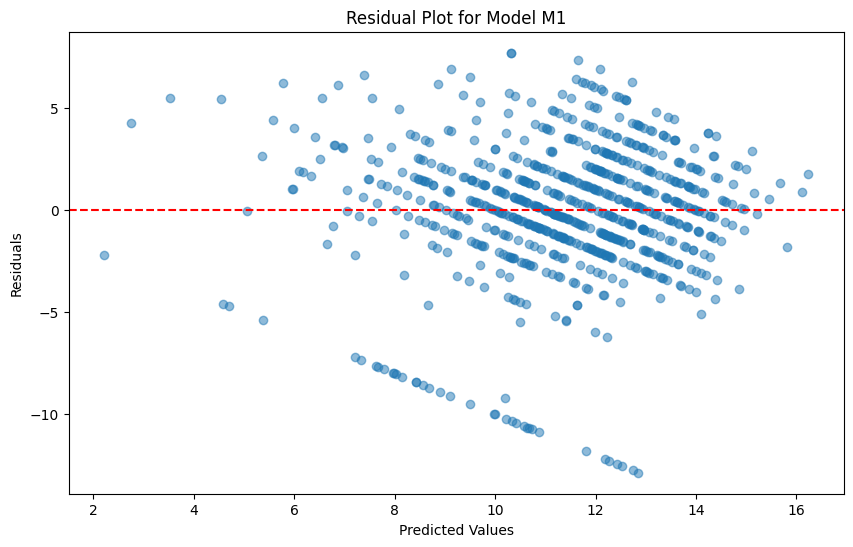

In [1054]:
residuals1 = y_true1 - y_pred1

plt.figure(figsize=(10, 6))
plt.scatter(y_pred1, residuals1, alpha=0.5)
plt.title('Residual Plot for Model M1')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

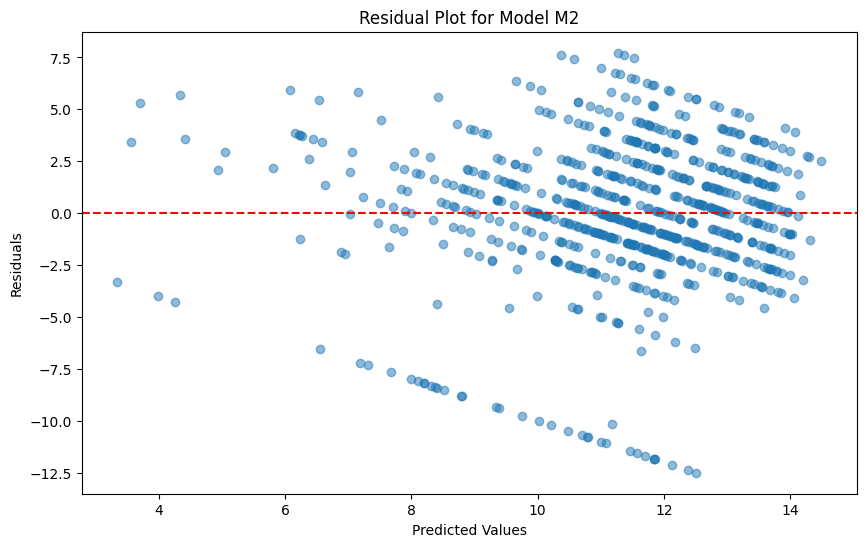

In [1055]:

residuals2 = y_true2 - y_pred2

plt.figure(figsize=(10, 6))
plt.scatter(y_pred2, residuals2, alpha=0.5)
plt.title('Residual Plot for Model M2')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


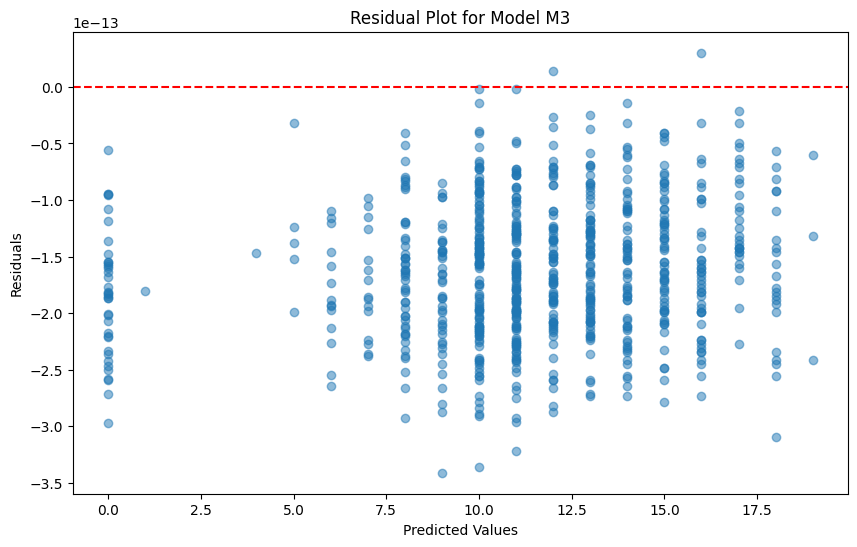

In [1056]:
residuals3 = y_true3 - y_pred3

plt.figure(figsize=(10, 6))
plt.scatter(y_pred3, residuals3, alpha=0.5)
plt.title('Residual Plot for Model M3')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

3-(5) Do residuals of M1, M2, and M3 follow the normal distribution based on the Jarque-Bera test? (significance level is 0.05). If residuals do not follow the normal distribution, what might be the cause?

In [1057]:
residuals = [residuals1, residuals2, residuals3]

skew1 = skew(residuals1)
kurtosis1 = kurtosis(residuals1)
jb1 = (n1 - p1)/6 * ((skew1)**2 + (1/4)*(kurtosis1-3)**2)

skew2 = skew(residuals2)
kurtosis2 = kurtosis(residuals2)
jb2 = (n2 - p2)/6 * ((skew2)**2 + (1/4)*(kurtosis2-3)**2)

skew3 = skew(residuals3)
kurtosis3 = kurtosis(residuals3)
jb3 = (n3 - p3)/6 * ((skew3)**2 + (1/4)*(kurtosis3-3)**2)

print("skew: ", skew1, skew2, skew3)
print("kurtosis: ", kurtosis1, kurtosis2, kurtosis3)
print("jb: ", jb1, jb2, jb3)

skew:  -1.0007013158565767 -0.9073962870703243 0.09634426253067721
kurtosis:  2.5045223683709965 2.0518990393223575 -0.23528333837733983
jb:  128.06470615239982 131.18616694225943 316.4386378115794


# Logistic regression

Using Cardiovascular disease dataset, build a classifier through logistic regression.

The included variables in this dataset as follows.

* cardio: Dependent variable, indicating the presence or absence of cardiovascular disease (binary: yes or no)
* age: age of the individuals in years
* gender: gender (binary: F or M)
* height: height in centimeters
* weight: weight in kilograms
* ap_hi: systolic blood pressure
* ap_lo: diastolic blood pressure
* cholesterol: cholesterol level (ordinal: from 1 to 3)
* gluc: glucose level (ordinal: from 1 to 3)
* smoke: whether a person smokes (binary: yes or no)
* alco: whether a person consumes alcohol (binary: yes or no)
* active: whether a person engages in regular physical activity (binary: yes or no)
  

In [1058]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [1059]:
df = pd.read_csv("cardio_original.csv")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,F,155,69.0,130,80,above normal,above normal,no,no,yes,no
1,40,F,163,71.0,110,70,normal,normal,no,no,yes,yes
2,60,F,165,70.0,120,80,normal,normal,no,no,yes,no
3,39,M,165,85.0,120,80,normal,normal,yes,yes,yes,no
4,64,F,155,62.0,120,80,normal,normal,no,no,yes,no


In [1060]:
df["gender"] = df["gender"].map({"M": 1, "F": 0})
df["cholesterol"] = df["cholesterol"].map(
    {"normal": 1, "above normal": 2, "well above normal": 3}
)
df["gluc"] = df["gluc"].map(
    {"normal": 1, "above normal": 2, "well above normal": 3}
)
df["smoke"] = df["smoke"].map({"yes": 1, "no": 0})
df["alco"] = df["alco"].map({"yes": 1, "no": 0})
df["active"] = df["active"].map({"yes": 1, "no": 0})
df["cardio"] = df["cardio"].map({"yes": 1, "no": 0})

numlist = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']


69301 12


<AxesSubplot: >

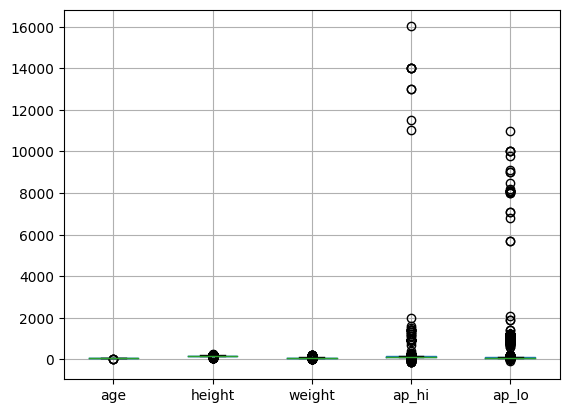

In [1061]:
df.head()

x = df.to_numpy()
n, p = x.shape
print(n, p)
df.boxplot(numlist)

(1) pre-process data. Some data samples have outliers for some variables, and they need to be properly addressed for accurate analysis. Implement box-plot-based outlier removal.

After removing outliers, split the whole dataset into training/test sets (8:2). Please maintain the same ratio of classes in both the training and test set.

C:\Users\saeye\AppData\Local\Temp\ipykernel_19296\1889415530.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df0 = df0[~min_outliers.any(axis=1)]


61881 12
49504 11
12377 11
(49504,)
(12377,)


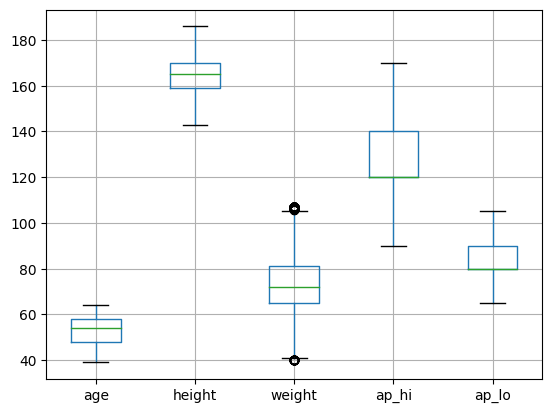

In [1062]:


q1 = df[numlist].quantile(0.25)
q3 = df[numlist].quantile(0.75)
iqr = q3 - q1
l_bound = q1 - 1.5 * iqr
u_bound = q3 + 1.5 * iqr



max_outliers = df[numlist] > u_bound
min_outliers = df[numlist] < l_bound

df0 = df[~max_outliers.any(axis=1)]
df0 = df0[~min_outliers.any(axis=1)]

x = df0.to_numpy()
n, p = x.shape
print(n, p)
df0.head()
df0.boxplot(numlist)

x0 = df0.iloc[:,:-1]
y0 = df0.iloc[:, -1]

x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size=0.2, random_state=1)

x_tn = x0_train.to_numpy()
x_tt = x0_test.to_numpy()

y_tn = y0_train.to_numpy()
y_tt = y0_test.to_numpy()

nxn, pxn = x_tn.shape
nyn = y_tn.shape

nxt, pxt = x_tt.shape
nyt = y_tt.shape

print(nxn, pxn)
print(nxt, pxt)
print(nyn)
print(nyt)


(2) Train logistic regression model using one of the explanatory variables using x_train and then calculate accuracy of the models using x_valid. Which variable is the most important according to the accuracy?

In [1063]:
reg = LogisticRegression()

colums_list = []
for i in range(10):
    s = x0_train.columns[i]
    print(s)
    colums_list.append(s)

for s in colums_list:
    x_ni = x0_train[[s]]
    reg.fit(x_ni, y_tn)
    x_ti = x0_test[[s]]
    score = reg.score(x_ti, y_tt)
    print(score)


age
gender
height
weight
ap_hi
ap_lo
cholesterol
gluc
smoke
alco
0.5927930839460289
0.5058576391694272
0.5117556758503676
0.5658075462551507
0.7098650723115456
0.6558132019067625
0.5919851337157631
0.5351054375050497
0.5058576391694272
0.5058576391694272


(3) Using the top two variables with the highest accuracy obtained for queestion (1), train a logistic regression model on x_train. Draw the decision boundary showing equal probability values for classes 0 and 1 (x: 1st rank variable, y: 2nd rank variable) with scatterplots of the samples used for the training (assign different colors depending on the predicted class for the scatterplot)

C:\Users\saeye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


int64
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


Text(0, 0.5, 'ap_lo')

Error in callback <function _draw_all_if_interactive at 0x000001BAD1CD2680> (for post_execute):


KeyboardInterrupt: 

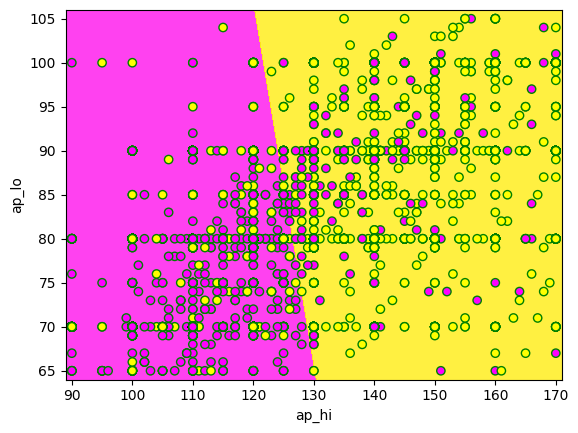

In [1064]:
x_aphi = x0_train[['ap_hi']]
x_aplo = x0_train[['ap_lo']]

x_aphit = x0_test[['ap_hi']]
x_aplot = x0_test[['ap_lo']]

x_ap = pd.DataFrame()
x_ap = pd.concat([x_ap, x_aphi], axis=1)
x_ap = pd.concat([x_ap, x_aplo], axis=1)

x_apt = pd.DataFrame()
x_apt = pd.concat([x_apt, x_aphit], axis=1)
x_apt = pd.concat([x_apt, x_aplot], axis=1)


reg.fit(x_ap, y_tn)
y_p = reg.predict(x_apt)

x_min = x_aphi.to_numpy().min() - 1
x_max = x_aphi.to_numpy().max() + 1

y_min = x_aplo.to_numpy().min() - 1
y_max = x_aplo.to_numpy().max() + 1

x_range = np.arange(x_min, x_max, 0.01)
y_range = np.arange(y_min, y_max, 0.01)

xx, yy = np.meshgrid(x_range, y_range)

z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

print(z.dtype)
print(z)

plt.contourf(xx, yy, z, alpha=0.8, cmap='spring')
plt.colorbar

plt.scatter(x_aphi, x_aplo, c=y_tn, edgecolors='g', cmap='spring')
plt.xlabel('ap_hi')
plt.ylabel('ap_lo')



(4) Using cardiovascular disease dataset, calculate accuracy with varying cutoff for the final decision. Candidates of cutoff is [0.05, 0.1, ..., 0.95]. Draw a line plot (x: cutoff, y: accuracy). For this problem, the model is trained using x_train and accuracy is calculated using x_valid.

C:\Users\saeye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


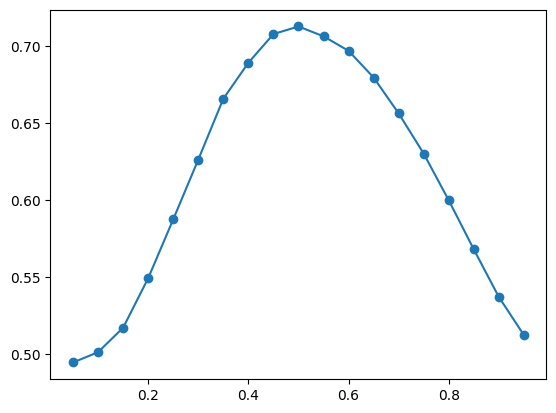

In [ ]:
from sklearn.metrics import accuracy_score

reg.fit(x_tn, y_tn)
prob1 = reg.predict_proba(x_tt)[:,1]
cutoff = np.arange(0.05, 1, 0.05)

score_list = []
for i in cutoff:
    y_pred_i = (prob1 >= i).astype(int)
    score = accuracy_score(y_tt, y_pred_i)
    score_list.append(score)

plt.figure()
plt.plot(cutoff, score_list, marker = 'o')